# Overview

Welcome to aurora-asi-lib. This introductary notebook guides you though some of the aurora-asi-lib (imported as asilib) functionality.

In [33]:
from datetime import datetime, timedelta
import numpy as np
import cartopy.crs as ccrs  # A dependency that is optional for asilib, but not for this notebook.
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import asilib

plt.style.use('dark_background')

First of all, you should know where the data and movies are saved to. This information is in `asilib.config` and can be changed with `python3 -m asilib config` to configure asilib.

In [2]:
asilib.config

{'ASILIB_DIR': PosixPath('/home/mike/research/aurora-asi-lib/asilib'),
 'ASI_DATA_DIR': PosixPath('/media/mike/2D6742F55A2E0A82/asilib-data')}

As you can guess, `asilib.config['ASILIB_DIR']` is the directory where this code resides, `asilib.config['ASI_DATA_DIR']` is the directory where the data is saved to.

# Plot a single image

Since we sold you on easily downloading, loading, plotting and analyzing auroral images with `asilib`, lets begin with a plot of an omega band studied in:

Liu, J., Lyons, L. R., Archer, W. E., Gallardo-Lacourt, B., Nishimura, Y., Zou, 
Y., … Weygand, J. M. (2018). Flow shears at the poleward boundary of omega bands 
observed during conjunctions of Swarm and THEMIS ASI. Geophysical Research Letters, 
45, 1218– 1227. https://doi.org/10.1002/2017GL076485

We can plot a fisheye lens image using `asilib.plot_image`.

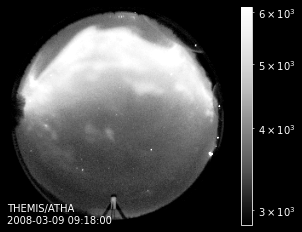

In [3]:
asi_array_code = 'THEMIS'
location_code = 'ATHA'
time = datetime(2008, 3, 9, 9, 18, 0)  # You can supply a datetime object or a ISO-formatted time string.

image_time, image, ax, im = asilib.plot_image(asi_array_code, location_code, time, 
                    color_norm='log', color_map='auto')
plt.colorbar(im)
ax.axis('off');

It is also easy to map the ASI fisheye lens image to a geographic map using `asilib.plot_map`. In the code box below, the first code section makes a custom map that shows up well in notebook with a black background.

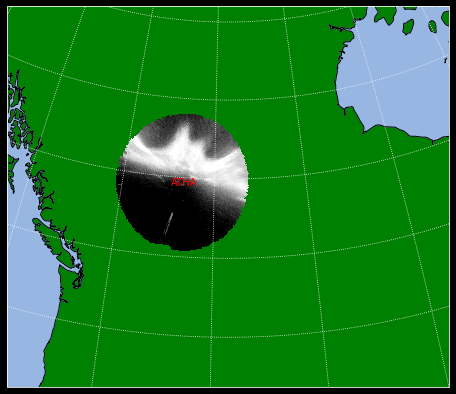

In [4]:
# asilib.plot_map() has a similar default subplot map. 
fig = plt.figure(figsize=(10, 7))
plot_extent = [-127, -90, 40, 65]
central_lon = np.mean(plot_extent[:2])
central_lat = np.mean(plot_extent[2:])
projection = ccrs.Orthographic(central_lon, central_lat)
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='green')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(linestyle=':')

map_alt_km = 110

asilib.plot_map(asi_array_code, location_code, time, map_alt_km, ax=ax);

Notice that you did not need to explicitly download or load the data---`asilib` takes care of that for you. If you need to explicitly download data, `asilib` comes with four functions to download the image and skymap files.

Now what if you need to analyze the image? `asilib.plot_image` returns the time stamp of the image `image_time` and the 2-d image np.array `image`.

In [5]:
image_time, image

(datetime.datetime(2008, 3, 9, 9, 18, 0, 51000),
 array([[2546, 2537, 2572, ..., 2554, 2616, 2536],
        [2608, 2613, 2562, ..., 2620, 2582, 2582],
        [2550, 2526, 2588, ..., 2568, 2560, 2544],
        ...,
        [2629, 2541, 2612, ..., 2553, 2546, 2525],
        [2569, 2568, 2510, ..., 2698, 2596, 2545],
        [2576, 2617, 2514, ..., 2602, 2577, 2502]], dtype=uint16))

You can also just load that image by using `asilib.load_image()`.

In [6]:
image_time, image = asilib.load_image(asi_array_code, location_code, time=time, force_download=False)

# Plot a Keogram

`asilib.plot_keogram` plots a keogram through the meridian, and using it is as simple as plotting a single image. If you don't specify a `map_alt`, the vertical axis will be pixel number. Note: `asilib.keogram` returns the keogram array that is plotted by `asilib.plot_keogram`.

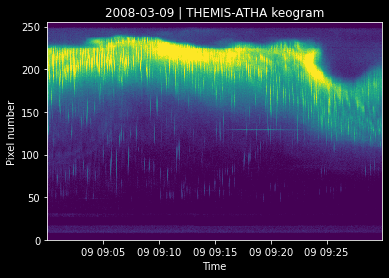

In [7]:
time_range = [datetime(2008, 3, 9, 9, 0, 0), datetime(2008, 3, 9, 9, 30, 0)]
asilib.plot_keogram(asi_array_code, location_code, time_range)
plt.xlabel('Time'); plt.ylabel('Pixel number');

And if you specify a `map_alt` (in kilometers), the vertical axis will be geographic latitude. Note: `asilib` does not support magnetic latitude ([AACGM](http://superdarn.thayer.dartmouth.edu/aacgm.html)) coordinates yet.

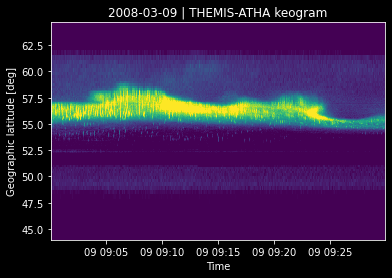

In [8]:
map_alt_km = 110
asilib.plot_keogram(asi_array_code, location_code, time_range, map_alt=map_alt_km)
plt.xlabel('Time'); plt.ylabel('Geographic latitude [deg]');

Simple enough? You can choose any other altitude from the `FULL_MAP_ALTITUDE` key in the skymap calibration data (described in the following section). If you pick a wrong altitude, `asilib` will give you a helpful error.

In [9]:
try:
    asilib.plot_keogram(asi_array_code, location_code, time_range, map_alt=100)
except AssertionError as err:
    print('AssetionError:', err)

AssetionError: 100 km is not in skymap altitudes: [ 90. 110. 150.] km


These aurora-emission altitudes are in the THEMIS ASI skymap files; They are different for the REGO ASIs.

# Skymap calibration data
You may wonder how the image's pixel values were mapped to geographic latitude---this is where the skymap files come in. `asilib` also makes this easy and you only need to give it the ASI array code, location code, and the time (so the correct skymap file is loaded).

In [10]:
skymap = asilib.load_skymap(asi_array_code, location_code, time)
skymap.keys()

dict_keys(['GENERATION_INFO', 'SITE_UID', 'IMAGER_UID', 'PROJECT_UID', 'IMAGER_UNIX_TIME', 'SITE_MAP_LATITUDE', 'SITE_MAP_LONGITUDE', 'SITE_MAP_ALTITUDE', 'FULL_ROW', 'FULL_COLUMN', 'FULL_IGNORE', 'FULL_SUBTRACT', 'FULL_MULTIPLY', 'FULL_ELEVATION', 'FULL_AZIMUTH', 'FULL_MAP_ALTITUDE', 'FULL_MAP_LATITUDE', 'FULL_MAP_LONGITUDE', 'FULL_BIN', 'BIN_ROW', 'BIN_COLUMN', 'BIN_ELEVATION', 'BIN_AZIMUTH', 'BIN_MAP_ALTITUDE', 'BIN_MAP_LATITUDE', 'BIN_MAP_LONGITUDE', 'skymap_path'])

The skymap data that `asilib` uses for keograms is the `FULL_MAP_LATITUDE`. Also, to confirm that you loaded the correct skymap file, the `skymap` dictionary contains a `skymap_path` key that points to the local skymap file. 

In [11]:
skymap['skymap_path']

PosixPath('/media/mike/2D6742F55A2E0A82/asilib-data/themis/skymap/atha/themis_skymap_atha_20070301-20090522_vXX.sav')

The possible skymap mapping altitudes (in meters) that you can use in `asilib.plot_keogram` and `asilib.plot_map`.

In [12]:
skymap['FULL_MAP_ALTITUDE']

array([ 90000., 110000., 150000.], dtype=float32)

# Mapping multiple all-sky images

While at this time `asilib` doesn't have an intuitive way to map multiple ASI images, you can plot the mapped images with a for-loop.

In the following example, we will replicate Fig. 2b from 

Donovan, E., Liu, W., Liang, J., Spanswick, E., Voronkov, I., Connors, M., ... & Rae, I. J. (2008). Simultaneous THEMIS in situ and auroral observations of a small substorm. Geophysical Research Letters, 35(17).

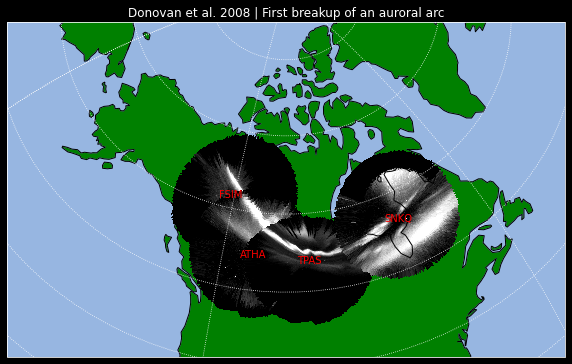

In [31]:
# ASI parameters
time = datetime(2007, 3, 13, 5, 8, 45)
asi_array_code = 'THEMIS'
location_codes = ['FSIM', 'ATHA', 'TPAS', 'SNKQ']
map_alt = 110
min_elevation = 2

# Create a map subplot.
fig = plt.figure(figsize=(10, 7))
plot_extent = [-160, -52, 40, 82]
central_lon = np.mean(plot_extent[:2])
central_lat = np.mean(plot_extent[2:])
projection = ccrs.Orthographic(central_lon, central_lat)
bx = fig.add_subplot(1, 1, 1, projection=projection)
bx.set_extent(plot_extent, crs=ccrs.PlateCarree())
bx.add_feature(cfeature.LAND, color='green')
bx.add_feature(cfeature.OCEAN)
bx.add_feature(cfeature.COASTLINE)
bx.gridlines(linestyle=':')

for location_code in location_codes:
    asilib.plot_map(asi_array_code, location_code, time, map_alt, ax=bx, 
        min_elevation=min_elevation)

bx.set_title('Donovan et al. 2008 | First breakup of an auroral arc');

# Working with multiple images

The `asilib.load_image` function can also load (and automatically download) image data given a time duration specified by `time_range`. In this section, we will plot a montage of fisheye lens images that show the equatorward movement of a STEVE aurora studied in

Gallardo-Lacourt, B., Nishimura, Y., Donovan, E., Gillies, D. M., Perry, G. W., Archer, W. E., et al. (2018). A statistical analysis of STEVE. Journal of Geophysical Research: Space Physics, 123, 9893– 9905. https://doi.org/10.1029/2018JA025368

In [46]:
asi_array_code = 'REGO'
location_code = 'LUCK'
time_range = [datetime(2017, 9, 27, 7, 15), datetime(2017, 9, 27, 8, 15)]

image_times, images = asilib.load_image(asi_array_code, location_code, time_range=time_range, force_download=False)

In [47]:
image_times.shape

(1200,)

In [48]:
images.shape  # First axis is time

(1200, 512, 512)

Now lets pick 5 images from that time interval and show the movement of STEVE.

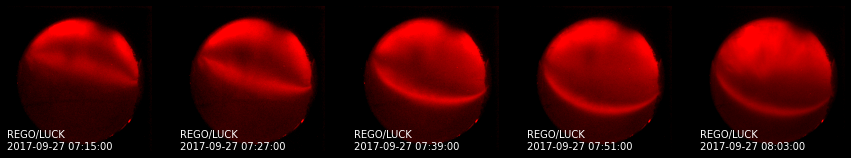

In [49]:
n_plots = 5

delta_time_s = int((time_range[1]-time_range[0]).total_seconds()/n_plots)
montage_times = [time_range[0]+timedelta(seconds=i*delta_time_s) for i in range(n_plots)]

fig, cx = plt.subplots(1, n_plots, figsize=(15, 8))

for montage_time, cx_i in zip(montage_times, cx):
    asilib.plot_image(asi_array_code, location_code, montage_time, ax=cx_i)
    cx_i.axis('off')

# Basic Movie

Let's now return to the 

# Satellite conjunction

Coming soon!